In [41]:
import pandas as pd

# file path
file_path = "../../data/bodyfat.csv"

# load CSV to DataFrame
df = pd.read_csv(file_path)

# Check the first 5 rows of the DataFrame
print(df.head())

   Density  BodyFat  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  \
0   1.0708     12.3   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0   
1   1.0853      6.1   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7   
2   1.0414     25.3   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6   
3   1.0751     10.4   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1   
4   1.0340     28.7   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2   

   Knee  Ankle  Biceps  Forearm  Wrist  
0  37.3   21.9    32.0     27.4   17.1  
1  37.3   23.4    30.5     28.9   18.2  
2  38.9   24.0    28.8     25.2   16.6  
3  37.3   22.8    32.4     29.4   18.2  
4  42.2   24.0    32.2     27.7   17.7  


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [43]:
# create x_train and y_train
x_train = df.drop(columns=['BodyFat'])
y_train = df['BodyFat']


# Check the first 5 rows of the DataFrame
print(x_train.head())
print(y_train.head())

   Density  Age  Weight  Height  Neck  Chest  Abdomen    Hip  Thigh  Knee  \
0   1.0708   23  154.25   67.75  36.2   93.1     85.2   94.5   59.0  37.3   
1   1.0853   22  173.25   72.25  38.5   93.6     83.0   98.7   58.7  37.3   
2   1.0414   22  154.00   66.25  34.0   95.8     87.9   99.2   59.6  38.9   
3   1.0751   26  184.75   72.25  37.4  101.8     86.4  101.2   60.1  37.3   
4   1.0340   24  184.25   71.25  34.4   97.3    100.0  101.9   63.2  42.2   

   Ankle  Biceps  Forearm  Wrist  
0   21.9    32.0     27.4   17.1  
1   23.4    30.5     28.9   18.2  
2   24.0    28.8     25.2   16.6  
3   22.8    32.4     29.4   18.2  
4   24.0    32.2     27.7   17.7  
0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: BodyFat, dtype: float64


In [44]:
# stanrdize the data
df = (df - df.mean()) / df.std()

# Check the first 5 rows of the DataFrame
print(df.head())

    Density   BodyFat       Age    Weight    Height      Neck     Chest  \
0  0.800055 -0.818617 -1.736617 -0.839575 -0.654901 -0.737198 -0.916224   
1  1.561952 -1.559469 -1.815970 -0.193078  0.573648  0.208949 -0.856916   
2 -0.744758  0.734783 -1.815970 -0.848082 -1.064418 -1.642207 -0.595958   
3  1.025997 -1.045652 -1.498561  0.198223  0.573648 -0.243556  0.115746   
4 -1.133588  1.141057 -1.657265  0.181210  0.300637 -1.477660 -0.418032   

    Abdomen       Hip     Thigh      Knee     Ankle    Biceps   Forearm  \
0 -0.682176 -0.754427 -0.077325 -0.535067 -0.709414 -0.090496 -0.625474   
1 -0.886199 -0.168168 -0.134468 -0.535067  0.175598 -0.586975  0.116847   
2 -0.431783 -0.098375  0.036962  0.128337  0.529602 -1.149652 -1.714210   
3 -0.570890  0.180797  0.132201 -0.535067 -0.178407  0.041899  0.364287   
4  0.690345  0.278507  0.722682  1.496607  0.529602 -0.024299 -0.477010   

      Wrist  
0 -1.210133  
1 -0.031879  
2 -1.745703  
3 -0.031879  
4 -0.567449  


In [45]:
# train the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

# print the model coefficients
print(model.coef_)
print(model.intercept_)


[-4.11237849e+02  1.25870031e-02  1.00541597e-02 -7.98073928e-03
 -2.84558253e-02  2.67803354e-02  1.85648834e-02  1.91660401e-02
 -1.67583631e-02 -4.63900522e-03 -8.56761181e-02 -5.50508219e-02
  3.38634347e-02  7.34493756e-03]
450.0125693445754


In [46]:
# predict the body fat
x_new = x_train.iloc[[0]]  # Select the first row as a DataFrame
y_new = model.predict(x_new)
print(y_new)
print(y_train.iloc[0])  # Use .iloc to access the first value in y_train


[12.06855256]
12.3


In [47]:
# evaluate the model
from sklearn.metrics import mean_squared_error

y_pred = model.predict(x_train)
mse = mean_squared_error(y_train, y_pred)
print(mse)

1.5272035183908108


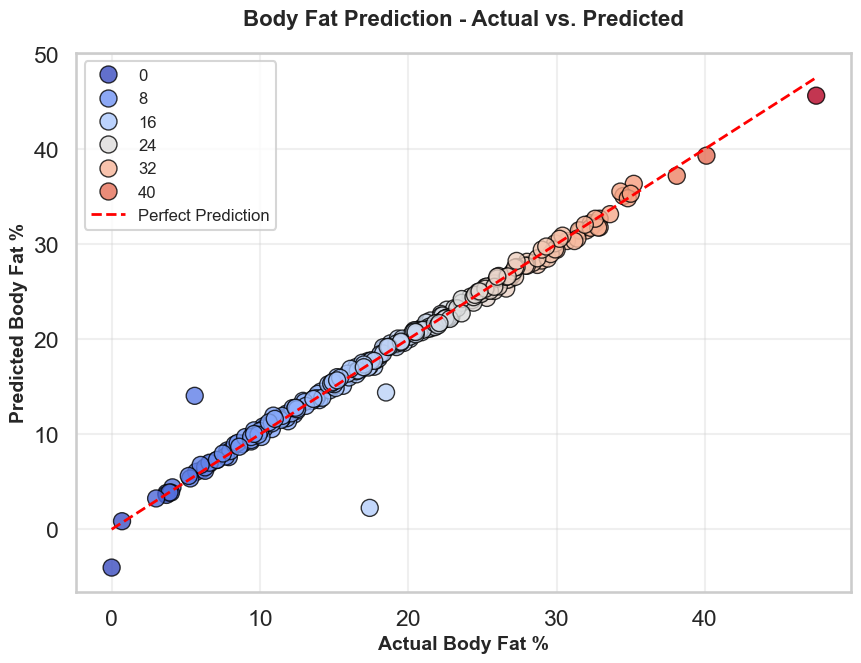

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Predict on the entire training dataset
y_pred = model.predict(x_train) 
y_train_actual = y_train.values  

# Create DataFrame for comparison
df = pd.DataFrame({'Actual': y_train_actual, 'Predicted': y_pred})

# Set Seaborn style
sns.set(style="whitegrid", context="talk")

# Create figure
plt.figure(figsize=(10, 7))

# Scatter plot with color gradient and larger markers
scatter = sns.scatterplot(
    x=df['Actual'], y=df['Predicted'], 
    hue=df['Actual'], palette="coolwarm", 
    edgecolor='black', s=150, alpha=0.8
)

# Perfect prediction reference line
plt.plot([min(df['Actual']), max(df['Actual'])], 
         [min(df['Actual']), max(df['Actual'])], 
         color='red', linestyle='dashed', linewidth=2, label='Perfect Prediction')

# Customize labels and title
plt.xlabel('Actual Body Fat %', fontsize=14, fontweight='bold')
plt.ylabel('Predicted Body Fat %', fontsize=14, fontweight='bold')
plt.title('Body Fat Prediction - Actual vs. Predicted', fontsize=16, fontweight='bold', pad=20)

# Add grid with transparency
plt.grid(alpha=0.3)

# Add legend
plt.legend(fontsize=12)

# Show plot
plt.show()


C:\Users\bax\AppData\Local\Temp\ipykernel_14476\525863342.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mse_df.index, y=mse_df['MSE'], palette='coolwarm')


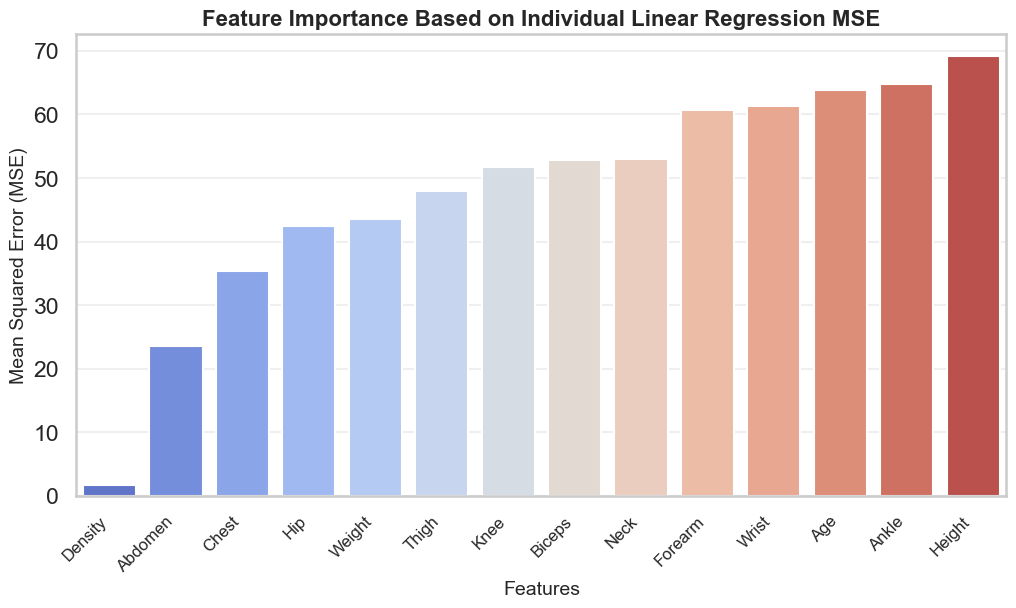

               MSE
Density   1.694135
Abdomen  23.601044
Chest    35.320143
Hip      42.491196
Weight   43.595134
Thigh    47.912472
Knee     51.708715
Biceps   52.784656
Neck     52.968540
Forearm  60.647481
Wrist    61.378987
Age      63.832101
Ankle    64.823228
Height   69.199176


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Dictionary to store MSE values for each feature
mse_results = {}

# Evaluate each feature individually
for column in x_train.columns:
    model = LinearRegression()
    model.fit(x_train[[column]], y_train)  # Train on single feature
    y_pred = model.predict(x_train[[column]])  # Predict
    mse = mean_squared_error(y_train, y_pred)  # Compute MSE
    mse_results[column] = mse  # Store result

# Convert results to DataFrame and sort by MSE (ascending)
mse_df = pd.DataFrame.from_dict(mse_results, orient='index', columns=['MSE']).sort_values(by='MSE')

# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x=mse_df.index, y=mse_df['MSE'], palette='coolwarm')

# Customize plot
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylabel('Mean Squared Error (MSE)', fontsize=14)
plt.xlabel('Features', fontsize=14)
plt.title('Feature Importance Based on Individual Linear Regression MSE', fontsize=16, fontweight='bold')
plt.grid(axis='y', alpha=0.3)

# Show plot
plt.show()

# Display sorted results
print(mse_df)



<Figure size 1400x600 with 0 Axes>

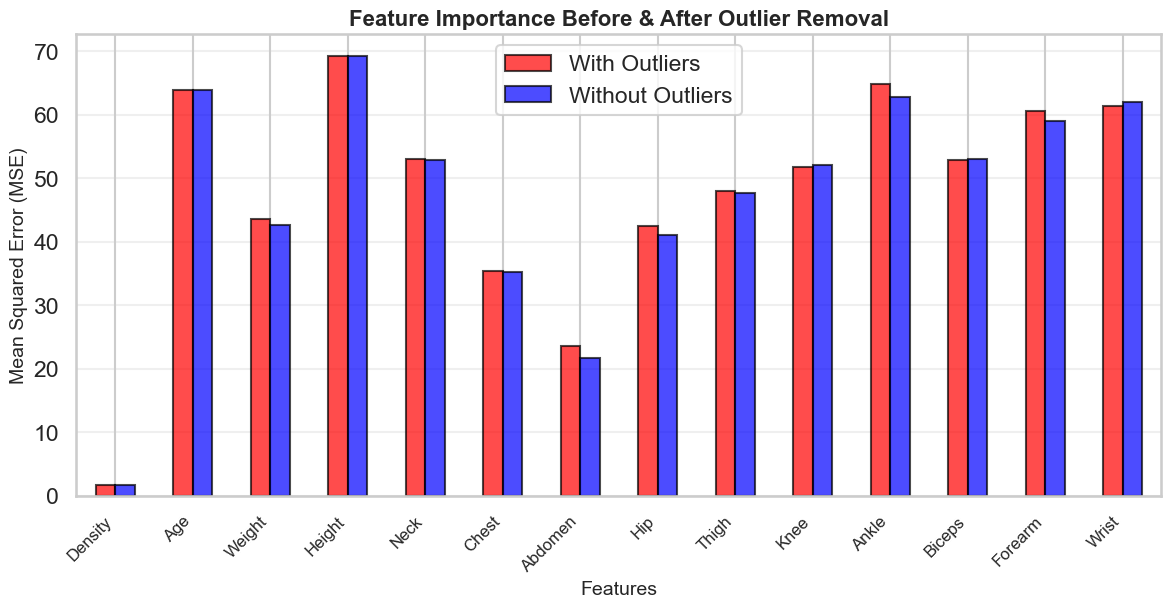

         With Outliers  Without Outliers
Density       1.694135          1.683563
Age          63.832101         63.832101
Weight       43.595134         42.710127
Height       69.199176         69.241782
Neck         52.968540         52.930477
Chest        35.320143         35.201355
Abdomen      23.601044         21.753502
Hip          42.491196         41.117972
Thigh        47.912472         47.678169
Knee         51.708715         52.069213
Ankle        64.823228         62.780975
Biceps       52.784656         52.987228
Forearm      60.647481         58.997500
Wrist        61.378987         61.955477


In [36]:
# without outliers
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Store MSE results before and after outlier removal
mse_results = {"With Outliers": {}, "Without Outliers": {}}

# Evaluate each feature individually
for column in x_train.columns:
    # Train model with outliers
    model = LinearRegression()
    model.fit(x_train[[column]], y_train)
    y_pred = model.predict(x_train[[column]])
    mse_results["With Outliers"][column] = mean_squared_error(y_train, y_pred)

    # Remove outliers
    df_clean = remove_outliers(pd.concat([x_train[[column]], y_train], axis=1), column)
    
    # Train model without outliers
    if not df_clean.empty:  # Ensure data exists after removing outliers
        model.fit(df_clean[[column]], df_clean[y_train.name])
        y_pred_clean = model.predict(df_clean[[column]])
        mse_results["Without Outliers"][column] = mean_squared_error(df_clean[y_train.name], y_pred_clean)
    else:
        mse_results["Without Outliers"][column] = np.nan  # If all data is removed

# Convert results to DataFrame
mse_df = pd.DataFrame(mse_results)

# Plot comparison
plt.figure(figsize=(14, 6))
mse_df.plot(kind="bar", figsize=(14, 6), color=["red", "blue"], alpha=0.7, edgecolor='black')

# Customize plot
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.ylabel("Mean Squared Error (MSE)", fontsize=14)
plt.xlabel("Features", fontsize=14)
plt.title("Feature Importance Before & After Outlier Removal", fontsize=16, fontweight="bold")
plt.legend(["With Outliers", "Without Outliers"])
plt.grid(axis="y", alpha=0.3)

# Show plot
plt.show()

# Display numerical comparison
print(mse_df)


In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Create an empty list to store MSE values
mse_matrix = []

# Iterate through each feature and calculate MSE
for column in x_train.columns:
    model = LinearRegression()
    model.fit(x_train[[column]], y_train)
    y_pred = model.predict(x_train[[column]])
    mse = mean_squared_error(y_train, y_pred)
    mse_matrix.append(mse)

# Convert the list to a NumPy matrix
mse_matrix = np.array(mse_matrix).reshape(-1, 1)  # Reshape into a column matrix

# Create a DataFrame for better visualization
mse_df = pd.DataFrame(mse_matrix, index=x_train.columns, columns=['MSE'])

# Print the matrix
print("MSE Matrix:\n", mse_matrix)

# Display the MSE matrix as a table
import ace_tools as tools
tools.display_dataframe_to_user(name="MSE Matrix", dataframe=mse_df)


MSE Matrix:
 [[ 1.6941351 ]
 [63.83210087]
 [43.59513374]
 [69.1991757 ]
 [52.96854016]
 [35.32014303]
 [23.60104379]
 [42.4911957 ]
 [47.91247228]
 [51.70871516]
 [64.82322829]
 [52.78465577]
 [60.64748051]
 [61.37898671]]


ModuleNotFoundError: No module named 'ace_tools'